# MKT 512 Group Project


**Dataset:** https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

**Purpose:** This analysis focuses on identifying the variables with the strongest relationship to overall flight satisfaction for Gen Z leisure travellers

### 1. Data Preparation

In [35]:
# importing packages
import sklearn
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as pyoff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option("display.min_rows", None)
pd.options.display.float_format = '{:.2f}'.format

In [36]:
## Importing the data
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [37]:
## Fixing the index
train_data.drop(columns=['Unnamed: 0'],inplace=True) 
train_data.set_index('id', inplace=True)
test_data.drop(columns=['Unnamed: 0'],inplace=True) 
test_data.set_index('id', inplace=True)

In [38]:
len(train_data)

103904

In [39]:
len(test_data)

25976

In [40]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,103904.00,39.38,15.11,7.00,27.00,40.00,51.00,85.00
Flight Distance,103904.00,1189.45,997.15,31.00,414.00,843.00,1743.00,4983.00
Inflight wifi service,103904.00,2.73,1.33,0.00,2.00,3.00,4.00,5.00
Departure/Arrival time convenient,103904.00,3.06,1.53,0.00,2.00,3.00,4.00,5.00
Ease of Online booking,103904.00,2.76,1.40,0.00,2.00,3.00,4.00,5.00
Gate location,103904.00,2.98,1.28,0.00,2.00,3.00,4.00,5.00
Food and drink,103904.00,3.20,1.33,0.00,2.00,3.00,4.00,5.00
Online boarding,103904.00,3.25,1.35,0.00,2.00,3.00,4.00,5.00
Seat comfort,103904.00,3.44,1.32,0.00,2.00,4.00,5.00,5.00
Inflight entertainment,103904.00,3.36,1.33,0.00,2.00,4.00,4.00,5.00


In [41]:
## Filtering for young people aged 18-25 that fly for personal reasons
test_data=test_data[(test_data['Age']<=25) &(test_data['Age']>=18)&(test_data['Type of Travel']=='Personal Travel')]
train_data=train_data[(train_data['Age']<=25) &(train_data['Age']>=18) &(train_data['Type of Travel']=='Personal Travel')]

In [42]:
len(train_data)

3983

In [43]:
len(test_data)

1011

In [44]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
75460,Male,Loyal Customer,22,Personal Travel,Eco,2342,3,2,3,3,3,3,1,3,2,4,3,4,2,3,19,0.00,neutral or dissatisfied
107794,Female,Loyal Customer,22,Personal Travel,Business,349,2,4,2,1,4,2,4,4,4,5,4,4,5,4,0,0.00,neutral or dissatisfied
82042,Male,Loyal Customer,21,Personal Travel,Eco,1454,2,2,2,3,5,2,5,5,2,3,3,1,3,5,0,0.00,neutral or dissatisfied
114534,Male,Loyal Customer,19,Personal Travel,Business,342,3,1,3,2,3,3,3,3,2,1,3,1,3,3,0,0.00,neutral or dissatisfied
23400,Male,Loyal Customer,20,Personal Travel,Eco,483,2,3,2,3,5,2,5,5,5,2,3,2,4,5,91,82.00,neutral or dissatisfied


In [45]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
75241,Male,Loyal Customer,22,Personal Travel,Eco,1846,4,5,4,4,5,4,5,5,5,4,4,4,4,5,40,68.00,neutral or dissatisfied
31533,Female,Loyal Customer,21,Personal Travel,Eco,846,1,4,1,3,3,1,3,3,5,4,5,4,5,3,9,17.00,neutral or dissatisfied
54444,Male,Loyal Customer,20,Personal Travel,Eco Plus,305,3,4,3,3,1,3,1,1,3,3,4,4,5,1,5,2.00,neutral or dissatisfied
3921,Female,Loyal Customer,22,Personal Travel,Eco,213,3,5,3,4,3,3,1,3,1,5,1,3,2,3,0,17.00,neutral or dissatisfied
69463,Male,Loyal Customer,21,Personal Travel,Eco,1096,2,2,2,4,2,2,3,2,3,1,3,2,4,2,0,0.00,neutral or dissatisfied


**Dealing with categorial variables**

In [46]:
## Exploring the unique contents of categorical variables

In [47]:
train_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [48]:
train_data['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [49]:
train_data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [50]:
## binary encoding for gender
train_data['Gender']=train_data['Gender'].map({"Male":1, "Female":0})

## binary encoding for loyal customers
train_data['Loyal Customer']=train_data['Customer Type'].map({'Loyal Customer':1, "disloyal Customer":0})

## binary encoding for business class
train_data['Business_Class']=train_data['Class'].map({'Business':1, 'Eco Plus':0,'Eco':0})
#train_data['Economy_Class']=train_data['Class'].map({'Business':0, 'Eco Plus':1,'Eco':1})

## binary encoding for dependent variable 'satisfaction'
train_data['Y_satisfied']=train_data['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})

In [51]:
## binary encoding for gender
test_data['Gender']=test_data['Gender'].map({"Male":1, "Female":0})

## binary encoding for loyal customers
test_data['Loyal Customer']=test_data['Customer Type'].map({'Loyal Customer':1, "disloyal Customer":0})

## binary encoding for business class
test_data['Business_Class']=test_data['Class'].map({'Business':1, 'Eco Plus':0,'Eco':0})
#test_data['Economy_Class']=test_data['Class'].map({'Business':0, 'Eco Plus':1,'Eco':1})

## binary encoding for dependent variable satisfaction
test_data['Y_satisfied']=test_data['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})

**Dealing with numerical variables**


In [52]:
## Filling null values for flights without a delay
train_data['Arrival Delay in Minutes'].fillna(0, inplace = True)
test_data['Arrival Delay in Minutes'].fillna(0, inplace = True)

<AxesSubplot:ylabel='Frequency'>

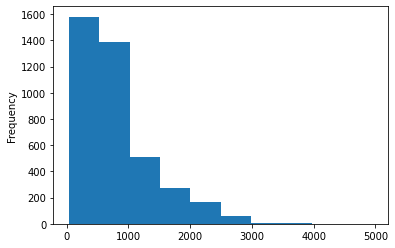

In [53]:
## Clear outliers can be identified in these variables, potentially weakening our analysis
train_data['Flight Distance'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

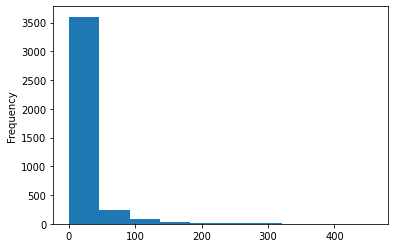

In [54]:
train_data['Arrival Delay in Minutes'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

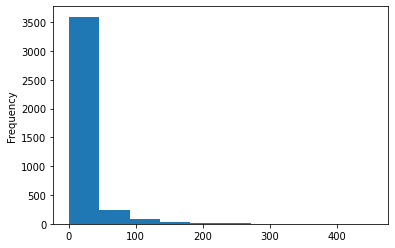

In [55]:
train_data['Departure Delay in Minutes'].plot.hist()

In [56]:
## Removing outliers for arrival/deprature delays beyond 95% quartile
train_data = train_data[train_data['Departure Delay in Minutes'].between
                        (train_data['Departure Delay in Minutes'].quantile(0), 
                         train_data['Departure Delay in Minutes'].quantile(.95))]

In [57]:
test_data = test_data[test_data['Departure Delay in Minutes'].between
                        (test_data['Departure Delay in Minutes'].quantile(0), 
                         test_data['Departure Delay in Minutes'].quantile(.95))]

In [58]:
train_data = train_data[train_data['Arrival Delay in Minutes'].between
                        (train_data['Arrival Delay in Minutes'].quantile(0), 
                         train_data['Arrival Delay in Minutes'].quantile(.95))]

In [59]:
test_data = test_data[test_data['Arrival Delay in Minutes'].between
                        (test_data['Arrival Delay in Minutes'].quantile(0), 
                         test_data['Arrival Delay in Minutes'].quantile(.95))]

In [60]:
## Removing outliers for distance beyond 95% quartile
train_data = train_data[train_data['Flight Distance'].between
                        (train_data['Flight Distance'].quantile(0), 
                         train_data['Flight Distance'].quantile(.95))]

In [61]:
test_data = test_data[test_data['Flight Distance'].between
                        (test_data['Flight Distance'].quantile(0), 
                         test_data['Flight Distance'].quantile(.95))]

In [62]:
## Creating Bins for numerical variables

In [63]:
train_data['Flight Distance'].describe()

count   3425.00
mean     709.70
std      452.26
min       31.00
25%      356.00
50%      599.00
75%      965.00
max     2133.00
Name: Flight Distance, dtype: float64

In [64]:
train_data['Departure Delay in Minutes'].describe()

count   3425.00
mean       5.98
std       11.47
min        0.00
25%        0.00
50%        0.00
75%        7.00
max       66.00
Name: Departure Delay in Minutes, dtype: float64

In [65]:
train_data['Arrival Delay in Minutes'].describe()

count   3425.00
mean       5.74
std       10.57
min        0.00
25%        0.00
50%        0.00
75%        7.00
max       46.00
Name: Arrival Delay in Minutes, dtype: float64

In [66]:
train_data['Flight Distance']=train_data['Flight Distance'].apply(lambda x: 0 if x <= 356 else 
                                                                  (1 if x <= 599 else 
                                                                   (2 if x <= 965 else 3)))

In [67]:
test_data['Flight Distance']=test_data['Flight Distance'].apply(lambda x: 0 if x <= 356 else 
                                                                  (1 if x <= 599 else 
                                                                   (2 if x <= 965 else 3)))

In [68]:
train_data['Departure Delay in Minutes'].describe()

count   3425.00
mean       5.98
std       11.47
min        0.00
25%        0.00
50%        0.00
75%        7.00
max       66.00
Name: Departure Delay in Minutes, dtype: float64

In [69]:
train_data['Departure Delay in Minutes']= train_data['Departure Delay in Minutes'].apply(lambda x: 3 if x <= 0 else 
                                                                  (2 if x <= 30 else 3))

In [70]:
test_data['Departure Delay in Minutes']= test_data['Departure Delay in Minutes'].apply(lambda x: 3 if x <= 0 else 
                                                                  (2 if x <= 30 else 1))

In [71]:
train_data['Arrival Delay in Minutes'].describe()

count   3425.00
mean       5.74
std       10.57
min        0.00
25%        0.00
50%        0.00
75%        7.00
max       46.00
Name: Arrival Delay in Minutes, dtype: float64

In [72]:
train_data['Arrival Delay in Minutes']= train_data['Arrival Delay in Minutes'].apply(lambda x: 0 if x <= 0 else 
                                                                  (1 if x <= 7 else 3))

In [73]:
test_data['Arrival Delay in Minutes']= test_data['Arrival Delay in Minutes'].apply(lambda x: 0 if x <= 0 else 
                                                                  (1 if x <= 7 else 3))

**Final Cleaning**

In [74]:
## Dropping unneccesary/old columns
train_data.drop(columns=['Age','Class','Customer Type','Type of Travel','satisfaction'],inplace=True) 
test_data.drop(columns=['Age','Class','Customer Type','Type of Travel','satisfaction'],inplace=True) 

In [75]:
## Cleaning column names

In [76]:
cols=train_data.columns
cols=cols.str.replace(' ','_')
cols=cols.str.replace('/','_')
cols=cols.str.replace('-','_')
train_data.columns=cols
test_data.columns=cols

In [77]:
train_data.head()

,Gender,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Loyal_Customer,Business_Class,Y_satisfied
id,,,,,,,,,,,,,,,,,,,,,
107794,0,0,2,4,2,1,4,2,4,4,4,5,4,4,5,4,3,0,1,1,0
82042,1,3,2,2,2,3,5,2,5,5,2,3,3,1,3,5,3,0,1,0,0
114534,1,0,3,1,3,2,3,3,3,3,2,1,3,1,3,3,3,0,1,1,0
18012,1,2,3,5,3,2,3,3,3,3,4,5,4,5,5,3,3,0,1,0,0
18311,0,1,4,0,4,3,3,4,1,3,3,2,5,4,5,3,2,1,1,0,0


In [78]:
test_data.head()

,Gender,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Loyal_Customer,Business_Class,Y_satisfied
id,,,,,,,,,,,,,,,,,,,,,
31533,0,2,1,4,1,3,3,1,3,3,5,4,5,4,5,3,2,3,1,0,0
54444,1,0,3,4,3,3,1,3,1,1,3,3,4,4,5,1,2,1,1,0,0
3921,0,0,3,5,3,4,3,3,1,3,1,5,1,3,2,3,3,3,1,0,0
69463,1,3,2,2,2,4,2,2,3,2,3,1,3,2,4,2,3,0,1,0,0
97762,1,1,3,4,3,5,1,3,1,1,5,3,5,4,4,1,3,0,1,0,0


### 2. Predictive Modelling

In [79]:
## Creating seperate dataframes for dependent/independent variables on train/test datasets
X_train=train_data.iloc[:,:-1]
y_train=train_data['Y_satisfied']

X_test=test_data.iloc[:,:-1]
y_test=test_data['Y_satisfied']

In [80]:
## random forest
clf_rf = RandomForestClassifier(n_estimators = 200)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
y_true = np.array(y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)     
AUC = metrics.auc(fpr, tpr)
matrix = confusion_matrix(y_true, y_pred)
TP = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TN = matrix[1][1]

Accuracy = accuracy_score(y_true, y_pred)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F = 2 * ((Precision * Recall)/(Precision + Recall))
dataframe_rf = pd.DataFrame([[Accuracy,Precision,Recall,F]],
             columns = ['Accuracy','Precision','Recall','F'])
dataframe_rf


,Accuracy,Precision,Recall,F
0,0.96,1.00,0.96,0.98


In [81]:
##neural net
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf_nn.fit(X_train, y_train)
y_pred = clf_nn.predict(X_test)
y_true = np.array(y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)     
AUC = metrics.auc(fpr, tpr)
matrix = confusion_matrix(y_true, y_pred)
TP = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TN = matrix[1][1]

Accuracy = accuracy_score(y_true, y_pred)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F = 2 * ((Precision * Recall)/(Precision + Recall))
dataframe_nn = pd.DataFrame([[Accuracy,Precision,Recall,F]],
             columns = ['Accuracy','Precision','Recall','F'])
dataframe_nn


,Accuracy,Precision,Recall,F
0,0.96,0.99,0.96,0.98


In [82]:
## logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_true = np.array(y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)     
AUC = metrics.auc(fpr, tpr)
matrix = confusion_matrix(y_true, y_pred)
TP = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TN = matrix[1][1]

Accuracy = accuracy_score(y_true, y_pred)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F = 2 * ((Precision * Recall)/(Precision + Recall))
dataframe_logit = pd.DataFrame([[Accuracy,Precision,Recall,F]],
             columns = ['Accuracy','Precision','Recall','F'])
dataframe_logit

,Accuracy,Precision,Recall,F
0,0.89,1.00,0.89,0.94


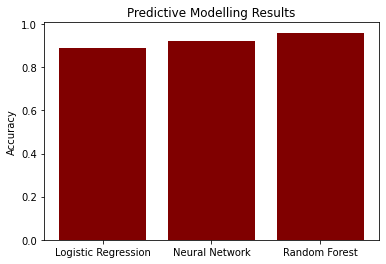

In [83]:
models=['Logistic Regression','Neural Network','Random Forest']
scores= [.89,.92,.96]
# plt.figure(fig)
plt.bar(models,scores,color='maroon')
plt.ylabel('Accuracy')
plt.title('Predictive Modelling Results')
plt.show()

## 3. Feature importance

In [84]:
## Concat/combine train & test to determine most impactful features on satisfaction
all_data = pd.concat([train_data,test_data])
X=all_data.iloc[:,:-1]
y=all_data.iloc[:,-1]
all_data.head()

,Gender,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Loyal_Customer,Business_Class,Y_satisfied
id,,,,,,,,,,,,,,,,,,,,,
107794,0,0,2,4,2,1,4,2,4,4,4,5,4,4,5,4,3,0,1,1,0
82042,1,3,2,2,2,3,5,2,5,5,2,3,3,1,3,5,3,0,1,0,0
114534,1,0,3,1,3,2,3,3,3,3,2,1,3,1,3,3,3,0,1,1,0
18012,1,2,3,5,3,2,3,3,3,3,4,5,4,5,5,3,3,0,1,0,0
18311,0,1,4,0,4,3,3,4,1,3,3,2,5,4,5,3,2,1,1,0,0


### Heat Map/Correlation Matrix

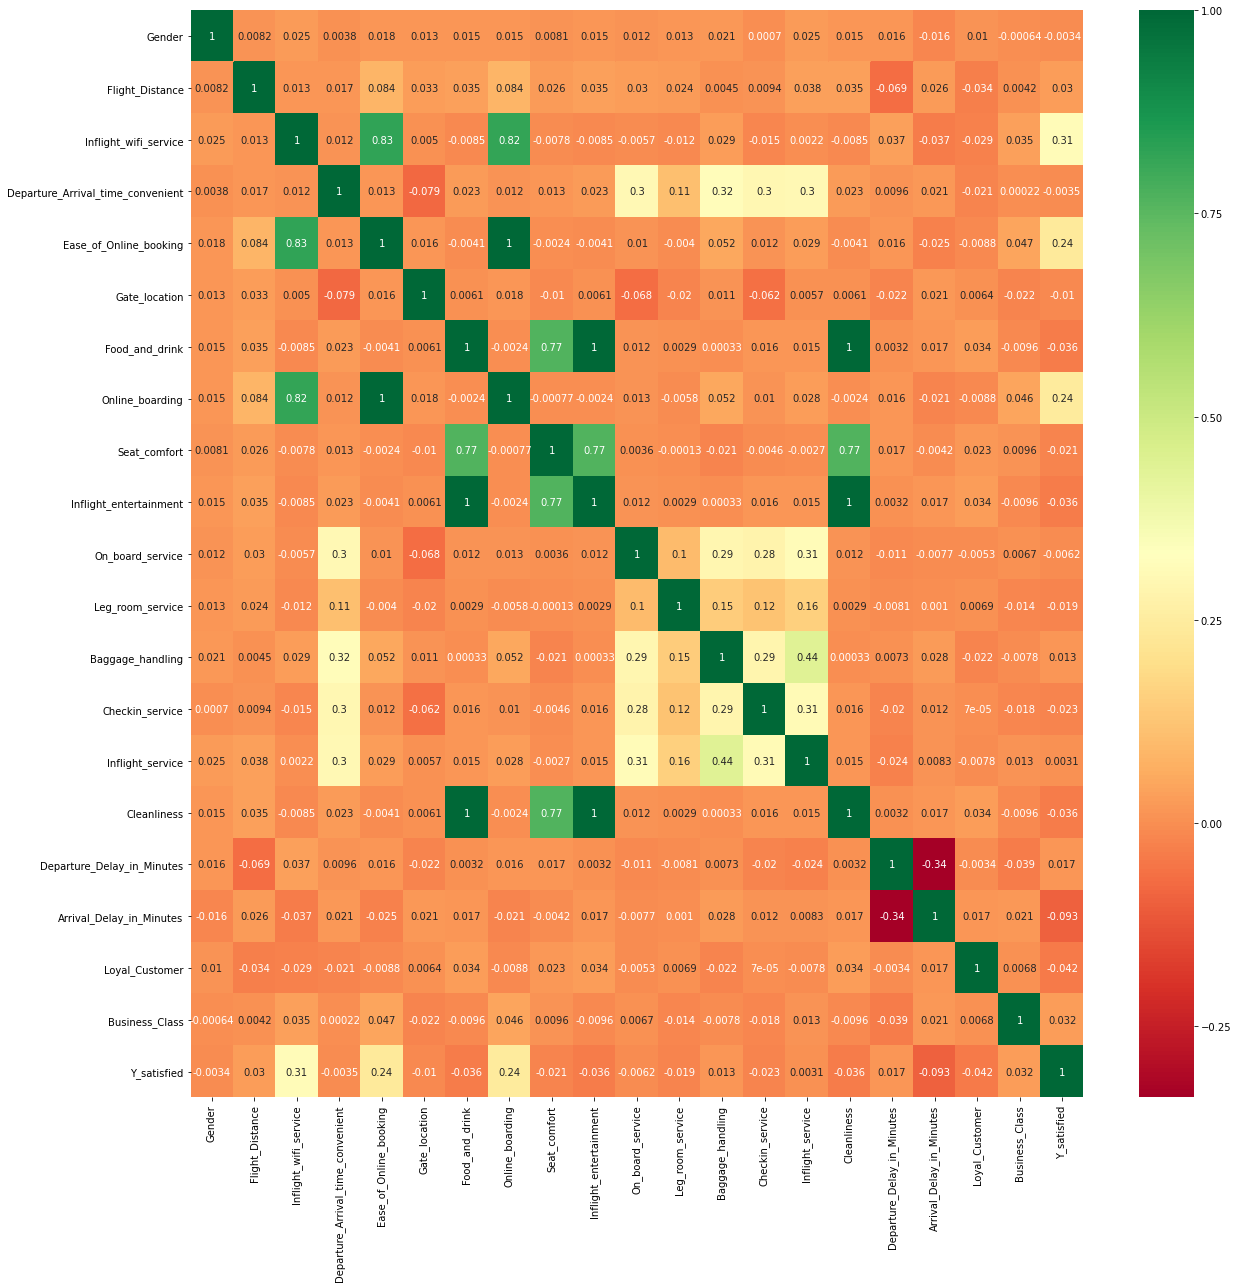

In [85]:
#get correlations of each features in dataset
corrmat = all_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Logistic Regression

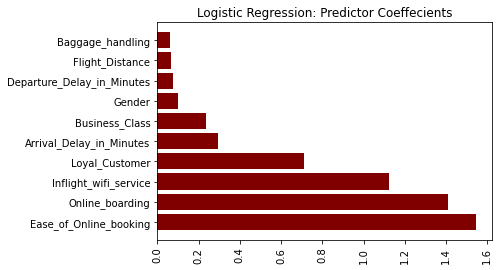

In [86]:
cols=all_data.columns[:-1]
model = LogisticRegression()
model.fit(X, y)

# get importance
importance = abs(model.coef_[0])
importance=pd.DataFrame(importance,cols).sort_values(by=[0],ascending=False)
importance=importance.iloc[:10,:]

plt.figure()
plt.title('Logistic Regression: Predictor Coeffecients')
plt.barh(importance.index,importance[0],color='maroon')
plt.xticks(rotation=90)
plt.show()

### Random Forest

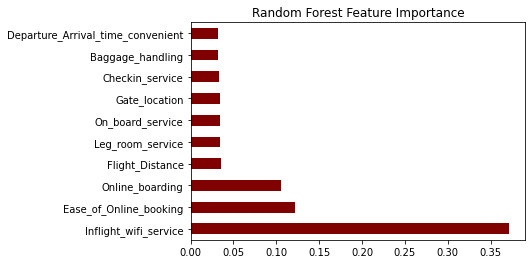

In [87]:
feat_importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh',title='Random Forest Feature Importance',color='maroon')
plt.show()


### Chi Square Test

In [88]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
featureScores['Score']=abs(featureScores['Score'])
featureScores.index=featureScores['Specs']

<AxesSubplot:title={'center':'Chi Square Feature Importance'}, ylabel='Specs'>

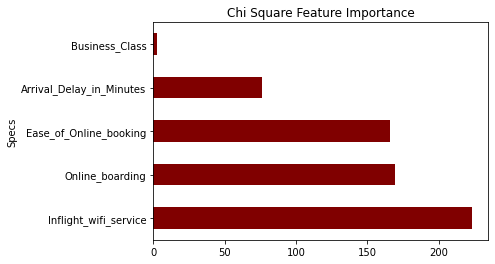

In [89]:
featureScores['Score'].nlargest(5).plot(kind='barh',title='Chi Square Feature Importance',color='maroon')